# Coding etiquette & excellent reporting

# Contents
1. Import libraries
2. Import datasets
3. Check imported data
4. Personally identifiable informaton (PII)
5. Regional Segmentation
6. Low-activity customers
7. Customer profiling
8. Profile visualisations
9. Profile aggregations
10. Profiles by region & department
11. Plot charts
12. Export dataframe

# 1. Import libraries

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import datasets

In [7]:
#Define project path
path = r'/Users/davidgriesel/Documents/0 - CareerFoundry/02 - Data Analytics Immersion/04 - Python Fundamentals for Data Analysts/Instacart Basket Analysis - IC 202409'

## 2.1. Merged dataset

In [9]:
#Import merged dataset
df_final_merged = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '09_final_merged.pkl'))

## 2.2. Departments

In [11]:
#Import departments dataset
df_departments = pd.read_csv(os.path.join(path, '02 - Data', 'Prepared Data', '04_departments_wrangled.csv'), index_col = 0)

# 3. Check imported data

## 3.1. Merged dataset

In [14]:
#View dimensions
df_final_merged.shape

(32404859, 33)

In [15]:
#Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [16]:
#View top 5 records/rows
df_final_merged.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 3.2. Departments

In [18]:
#Get dimensions
df_departments.shape

(21, 1)

In [19]:
#View top 5 records/rows
df_departments.head()

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol


# 4. Personally identifiable information (PII)

## 4.1. Identify columns with personal information

In [22]:
#Get column names
df_final_merged.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days', 'frequency_flag',
       'first_name', 'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'marital_status', 'income'],
      dtype='object')

##### Columns containing personal information: 'first_name', 'surname', 'gender', 'state', 'age', 'number-of_dependents', 'family_status', 'income'
##### Columns that can be used to identify individuals (PII): 'first_name' and 'surname'

## 4.2. Remove columns with PII

In [25]:
#Drop 'first_name' and 'surname' columns
df_final_merged = df_final_merged.drop(columns = ['first_name', 'surname'])

In [26]:
#Get dimensions
df_final_merged.shape

(32404859, 31)

In [27]:
#Get column names
df_final_merged.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income'],
      dtype='object')

##### The 'first_name' and 'surname' columns successfully removed.

# 5. Regional Segmentation

## 5.1. Identify states

In [31]:
#View values in 'state' column
df_final_merged['state'].value_counts(dropna = False).sort_index()

state
Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
Ne

In [32]:
#Count number of unique values in 'state' column
states = df_final_merged['state'].nunique(dropna = False)
states

51

##### There are 51 states for allocation to regions

## 5.2. Add 'region' column
[Wikipedia source used for allocation](https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States) 


In [35]:
#Allocate states
result_1 = []
for value in df_final_merged['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result_1.append('Northeast')
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result_1.append('Midwest')
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result_1.append('South')
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result_1.append('West')
  else:
    result_1.append('Unallocated') #Check

In [36]:
#View result
result_1

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [37]:
#Assign result to a new column
df_final_merged['region'] = result_1

In [38]:
#Get dimensions
df_final_merged.shape

(32404859, 32)

In [39]:
#Get column names
df_final_merged.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_label', 'busiest_day',
       'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_days', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependents', 'marital_status',
       'income', 'region'],
      dtype='object')

In [40]:
#View distribution of values in 'region' column
df_final_merged['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 5.3. Spending habits per region

In [42]:
#Cross variables
regional_spending_habits = pd.crosstab(df_final_merged['region'], df_final_merged['spending_flag'], dropna = False)

In [43]:
#View the resulting table
regional_spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,29294,7568031
Northeast,18642,5704094
South,40739,10751146
West,31286,8261627


# 6. Low-activity customers

## 6.1. Add 'activity_flag' column

In [46]:
#View top 5 records/rows
df_final_merged.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,gender,state,age,date_joined,number_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,Low-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [47]:
#Allocate activity
result_2 = []
for value in df_final_merged['max_order']:
  if value < 5:
    result_2.append('inactive')
  elif value >= 5:
    result_2.append('active')
  else:
    result_2.append('unallocated') #Check

In [48]:
#View results
result_2

['active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',
 'active',

In [49]:
#Assign result to a new column
df_final_merged['activity_flag'] = result_2

In [50]:
#View dimensions
df_final_merged.shape

(32404859, 33)

In [51]:
#View distribution of values in 'activity_flag' column
df_final_merged['activity_flag'].value_counts(dropna = False)

activity_flag
active      30964564
inactive     1440295
Name: count, dtype: int64

In [52]:
#Group by activity_flag and count the unique user_ids per flag
df_final_merged.groupby('activity_flag')['user_id'].nunique()

activity_flag
active      162631
inactive     43578
Name: user_id, dtype: int64

In [53]:
#Create subset of active customers only
df_active_customers = df_final_merged[df_final_merged['activity_flag'] == 'active']

In [54]:
#View dimensions
df_active_customers.shape

(30964564, 33)

## 6.2. Export for CFO

In [56]:
#Export to .csv for CFO
df_active_customers.to_csv(os.path.join(path, '02 - Data', 'Prepared Data', '10_active_customers.csv'))

# 7. Customer profiling

## 7.1. Age profile

In [59]:
#View values in 'age' column
df_final_merged['age'].value_counts(dropna = False).sort_index()

age
18    500474
19    519606
20    502848
21    512527
22    513853
       ...  
77    502120
78    495311
79    529742
80    515246
81    509284
Name: count, Length: 64, dtype: int64

In [60]:
#Allocate age
result_3 = []
for value in df_final_merged['age']:
  if value <= 34:
    result_3.append('Young')
  elif value <= 64:
    result_3.append('Adult')
  elif value <= 81:
    result_3.append('Senior')
  else:
    result_3.append('unallocated')

In [61]:
#Assign result to a new column
df_final_merged['age_profile'] = result_3

In [62]:
#View dimensions
df_final_merged.shape

(32404859, 34)

In [63]:
# Define the correct order for category
age_order = ['Young', 'Adult', 'Senior']

In [64]:
# Convert 'age_profile' to categorical type with the specified order
df_final_merged['age_profile'] = pd.Categorical(df_final_merged['age_profile'], categories = age_order, ordered = True)

In [65]:
#View distribution of values in 'age_profile' column
df_final_merged['age_profile'].value_counts(dropna = False).sort_index()

age_profile
Young      8627655
Adult     15202120
Senior     8575084
Name: count, dtype: int64

In [66]:
#Group by age_profile and count the unique user_ids per flag
df_final_merged.groupby('age_profile', observed = False)['user_id'].nunique()

age_profile
Young     54840
Adult     96640
Senior    54729
Name: user_id, dtype: int64

## 7.2. Income profile

In [68]:
df_final_merged['income'].value_counts(dropna = False).sort_index()

income
25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: count, Length: 108012, dtype: int64

In [69]:
#Allocate income
result_4 = []
for value in df_final_merged['income']:
  if value <= 54999:
    result_4.append('Low income')
  elif value <= 149999:
    result_4.append('Middle income')
  else:
    result_4.append('High income') #Check

In [70]:
#Assign result to a new column
df_final_merged['income_profile'] = result_4

In [71]:
#View dimensions
df_final_merged.shape

(32404859, 35)

In [72]:
# Define the correct order for category
income_order = ['Low income', 'Middle income', 'High income']

In [73]:
# Convert 'age_profile' to categorical type with the specified order
df_final_merged['income_profile'] = pd.Categorical(df_final_merged['income_profile'], categories = income_order, ordered = True)

In [74]:
#View distribution of values in 'income_profile' column
df_final_merged['income_profile'].value_counts(dropna = False).sort_index()

income_profile
Low income        4739985
Middle income    23613293
High income       4051581
Name: count, dtype: int64

In [75]:
#Group by income_profile and count the unique user_ids per flag
df_final_merged.groupby('income_profile', observed = False)['user_id'].nunique()

income_profile
Low income        42113
Middle income    140842
High income       23254
Name: user_id, dtype: int64

## 7.3. Family status

### 7.3.1. Parental status

In [78]:
#View distribution of values in 'number_of_dependents' column
df_final_merged['number_of_dependents'].value_counts(dropna = False).sort_index()

number_of_dependents
0    8097503
1    8081104
2    8091143
3    8135109
Name: count, dtype: int64

In [79]:
#Allocate dependents
result_5 = []
for value in df_final_merged['number_of_dependents']:
  if value == 0:
    result_5.append('non-parent')
  elif value > 0:
    result_5.append('parent')
  else:
    result_5.append('unallocated') #Check

In [80]:
#Assign result to a new column
df_final_merged['parental_status'] = result_5

In [81]:
#Get dimensions
df_final_merged.shape

(32404859, 36)

In [82]:
#View distribution of values in 'parent_profile' column
df_final_merged['parental_status'].value_counts(dropna = False).sort_index()

parental_status
non-parent     8097503
parent        24307356
Name: count, dtype: int64

### 7.3.2. Marital status

In [84]:
#View distribution of values in 'marital_status' column
df_final_merged['marital_status'].value_counts(dropna = False).sort_index()

marital_status
divorced/widowed                     2771812
living with parents and siblings     1550603
married                             22756753
single                               5325691
Name: count, dtype: int64

### 7.3.3. Family status

In [86]:
#Cross variables
marital_vs_parental_status = pd.crosstab(df_final_merged['marital_status'], df_final_merged['parental_status'], dropna = False)

In [87]:
#View the resulting table
marital_vs_parental_status

parental_status,non-parent,parent
marital_status,,
divorced/widowed,2771812,0
living with parents and siblings,0,1550603
married,0,22756753
single,5325691,0


##### Allocate lables as follows:
- None of the divorced/widowed and single users have children and can be classified as single adults.
- All users that live with their parents or siblings are also parents and can be classified as young parents.
- All married users are parents and can be classified as families.

In [89]:
#Allocate family status
result_6 = []
for value in df_final_merged['marital_status']:
  if value == 'divorced/widowed':
    result_6.append('Single adult')
  elif value == 'living with parents and siblings':
    result_6.append('Young parent')
  elif value == 'married':
    result_6.append('Family')
  elif value == 'single':
    result_6.append('Single adult')
  else:
    result_6.append('unallocated') #Check

In [90]:
#Assign result to a new column
df_final_merged['family_status'] = result_6

In [91]:
#Get dimensions
df_final_merged.shape

(32404859, 37)

In [92]:
#Define order for the family categories
family_order = ['Single adult', 'Young parent', 'Family']

In [93]:
#Convert 'family_status' column to a categorical type with the specified order
df_final_merged['family_status'] = pd.Categorical(df_final_merged['family_status'], categories = family_order, ordered = True)

In [94]:
#View distribution of values in 'parent_profile' column
df_final_merged['family_status'].value_counts(dropna = False).sort_index()

family_status
Single adult     8097503
Young parent     1550603
Family          22756753
Name: count, dtype: int64

In [95]:
#Group by parental_status and count the unique user_ids per flag
df_final_merged.groupby('family_status', observed = False)['user_id'].nunique()

family_status
Single adult     51602
Young parent      9701
Family          144906
Name: user_id, dtype: int64

# 8. Other

## 8.1. Product category

### 8.1.1. Define the variable

In [99]:
#View distribution of values in 'department_id' column
df_final_merged['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [100]:
#Turn dataframe into data dictionary
data_dictionary = df_departments.to_dict('index')

In [101]:
#View created data dictionary
data_dictionary

{1: {'department': 'frozen'},
 2: {'department': 'other'},
 3: {'department': 'bakery'},
 4: {'department': 'produce'},
 5: {'department': 'alcohol'},
 6: {'department': 'international'},
 7: {'department': 'beverages'},
 8: {'department': 'pets'},
 9: {'department': 'dry goods pasta'},
 10: {'department': 'bulk'},
 11: {'department': 'personal care'},
 12: {'department': 'meat seafood'},
 13: {'department': 'pantry'},
 14: {'department': 'breakfast'},
 15: {'department': 'canned goods'},
 16: {'department': 'dairy eggs'},
 17: {'department': 'household'},
 18: {'department': 'babies'},
 19: {'department': 'snacks'},
 20: {'department': 'deli'},
 21: {'department': 'missing'}}

##### Categories can be allocated as follows:
- beverages as beverages [7]
- alcoholic as alcoholic beverages [5]
- dairy eggs, deli, meat seafood, produce & bakery as perishables [16,20,12,4,3]
- frozen, bulk, canned goods, dry goods pasta, pantry, snacks & breakfast as non-perishables [1,10,15,9,13,19,14]
- household as household [17]
- personal care as personal care [11]
- pets as pets [8]
- babies as babies [18]
- international, missing & other as miscellaneous [6,21,2]

### 8.1.2. Allocate the variable

In [104]:
#Allocate departments
result_8 = []
for value in df_final_merged['department_id']:
  if value in [7]:
    result_8.append('beverages')
  elif value in [5]:
    result_8.append('alcoholic beverages')
  elif value in [16,20,12,4,3]:
    result_8.append('perishables')
  elif value in [1,10,15,9,13,19,14]:
    result_8.append('non-perishables')
  elif value in [17]:
    result_8.append('household')
  elif value in [11]:
    result_8.append('personal care')
  elif value in [8]:
    result_8.append('pets')
  elif value in [18]:
    result_8.append('babies')
  elif value in [6,21,2]:
    result_8.append('miscellaneous')
  else:
    result_8.append('unallocated') #Check

In [105]:
#Assign result to a new column
df_final_merged['product_category'] = result_8

In [106]:
#View dimensions
df_final_merged.shape

(32404859, 38)

In [107]:
#View distribution of values in 'departments_profile' column
df_final_merged['product_category'].value_counts(dropna = False).sort_values(ascending = False)

product_category
perishables            17810642
non-perishables         9669953
beverages               2688123
household                738666
personal care            447572
babies                   423802
miscellaneous            374689
alcoholic beverages      153696
pets                      97716
Name: count, dtype: int64

## 8.2. Loyalty flag by frequency flag

In [109]:
# Define the correct order for loyalty_flag and frequency_flag
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']
frequency_order = ['Non-frequent customer', 'Regular customer', 'Frequent customer']

In [110]:
# Convert 'loyalty_flag' and 'frequency_flag' to categorical types with the specified order
df_final_merged['loyalty_flag'] = pd.Categorical(df_final_merged['loyalty_flag'], categories=loyalty_order, ordered=True)
df_final_merged['frequency_flag'] = pd.Categorical(df_final_merged['frequency_flag'], categories=frequency_order, ordered=True)

In [111]:
#Cross variables
loyalty_flag_by_frequency_flag = pd.crosstab(df_final_merged['loyalty_flag'], df_final_merged['frequency_flag'], dropna = False)

In [112]:
#View the resulting table
loyalty_flag_by_frequency_flag

frequency_flag,Non-frequent customer,Regular customer,Frequent customer
loyalty_flag,,,
New customer,2724967,1870352,1648671
Regular customer,911475,5334079,9631222
Loyal customer,0,4133,10279960


# 9. Visualisations

## 9.1. Age profile

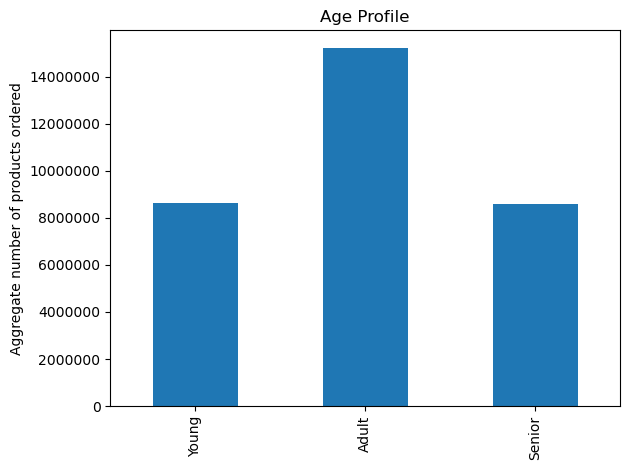

In [115]:
#Create bar chart
age_profile_chart = df_final_merged['age_profile'].value_counts().sort_index().plot.bar()

#Set the title and labels
plt.title('Age Profile')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

In [116]:
age_profile_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.1 - Age profile.png'))

## 9.2. Income profile

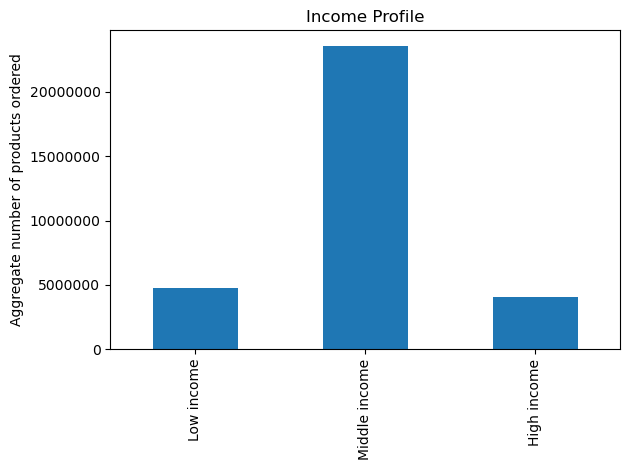

In [118]:
#Create bar chart
income_profile_chart = df_final_merged['income_profile'].value_counts().sort_index().plot.bar()

#Set the title and labels
plt.title('Income Profile')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

In [119]:
income_profile_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.2 - Income profile.png'))

## 9.3. Family status

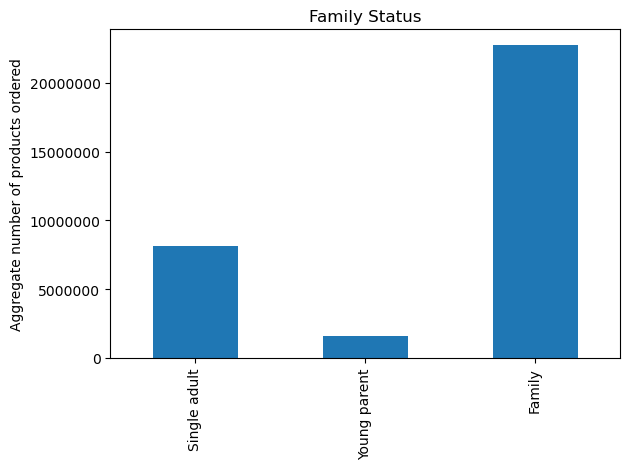

In [121]:
#Create bar chart
family_status_chart = df_final_merged['family_status'].value_counts().sort_index().plot.bar()

#Set the title and labels
plt.title('Family Status')
plt.xlabel('') 
plt.ylabel('Aggregate number of products ordered') 

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

In [122]:
family_status_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.3 - Family status.png'))

## 9.4. Region

In [124]:
#View distribution of values in 'region' column
df_final_merged['region'].value_counts(dropna = False).sort_index()

region
Midwest       7597325
Northeast     5722736
South        10791885
West          8292913
Name: count, dtype: int64

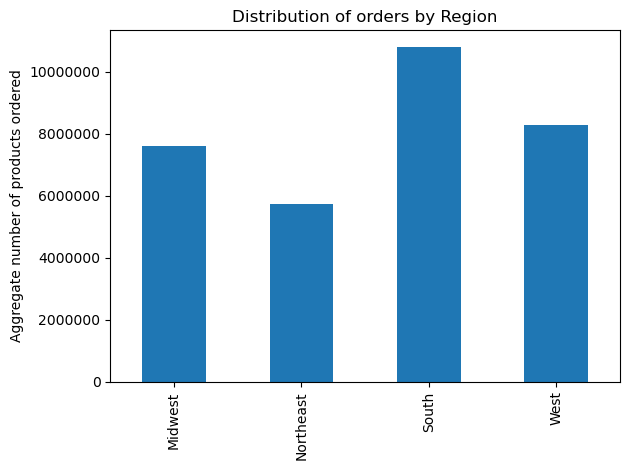

In [125]:
#Create bar chart
region_chart = df_final_merged['region'].value_counts().sort_index().plot.bar()

#Set the title and labels
plt.title('Distribution of orders by Region')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

In [126]:
region_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.4 - Distribution of orders by Region.png'))

## 9.5. Department

In [128]:
#View distribution of values in 'department_id' column
df_final_merged['department_id'].value_counts(dropna = False).sort_index()

department_id
1     2234743
2       36291
3     1172428
4     9479291
5      153696
6      269253
7     2688123
8       97716
9      866627
10      34573
11     447572
12     708927
13    1875369
14     703033
15    1068058
16    5398747
17     738666
18     423802
19    2887550
20    1051249
21      69145
Name: count, dtype: int64

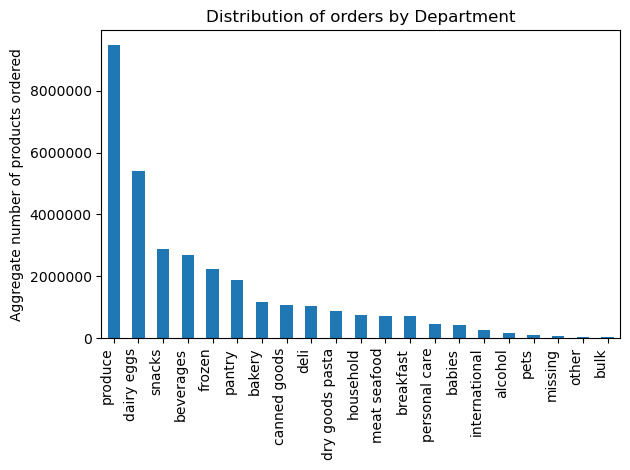

In [129]:
#Create a bar chart using the department_id counts
department_id_chart = df_final_merged['department_id'].value_counts(ascending = False).plot.bar()

#Create a list of department names in the same order as the bar chart
department_labels = [data_dictionary[dept_id]['department'] for dept_id in df_final_merged['department_id'].value_counts(ascending=False).index]

#Set the x-axis tick labels to the department names
department_id_chart.set_xticklabels(department_labels, rotation = 90, ha = 'right')

#Set the title and labels
plt.title('Distribution of orders by Department')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()


In [130]:
department_id_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.5 - Distribution of orders by Department.png'))

## 9.6. Product_category

In [132]:
#View distribution of values in 'product_category' column
df_final_merged['product_category'].value_counts(dropna = False).sort_index()

product_category
alcoholic beverages      153696
babies                   423802
beverages               2688123
household                738666
miscellaneous            374689
non-perishables         9669953
perishables            17810642
personal care            447572
pets                      97716
Name: count, dtype: int64

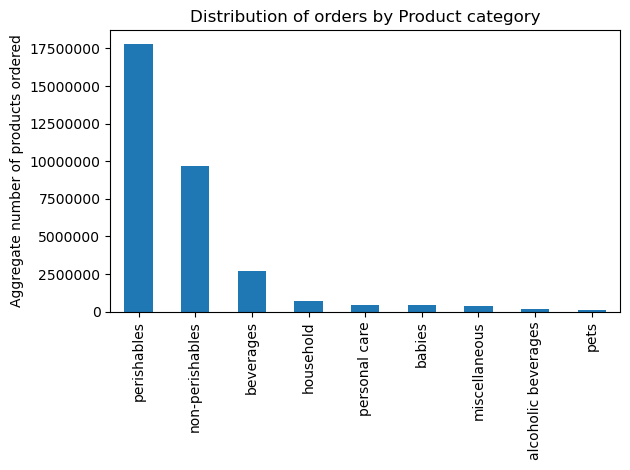

In [133]:
#Create bar chart
product_category_chart = df_final_merged['product_category'].value_counts(ascending = False).plot.bar()

#Set the title and labels
plt.title('Distribution of orders by Product category')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

In [134]:
product_category_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.6 - Distribution of orders by Product category.png'))

## 9.7. Loyalty flag by frequency flag

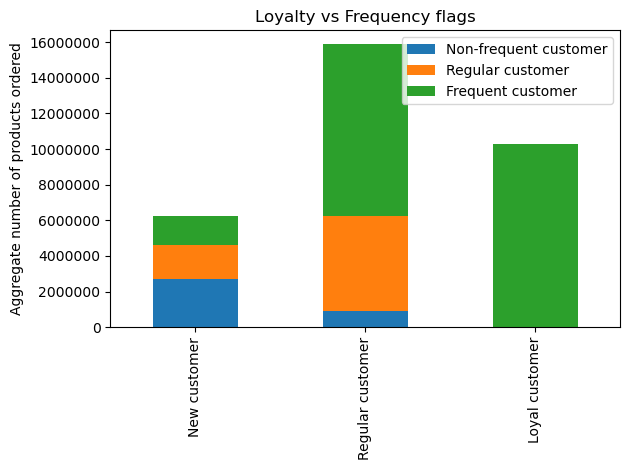

In [136]:
# Plot the stacked bar chart
loyalty_flag_by_frequency_flag_chart = loyalty_flag_by_frequency_flag.plot(kind='bar', stacked=True)

# Add title and labels
plt.title('Loyalty vs Frequency flags')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')
plt.legend(title = None)

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Display the plot
plt.show()

In [137]:
loyalty_flag_by_frequency_flag_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.7 - Loyalty by Frequency.png'))

# 10. Profile aggregations

## 10.1. Age profile

In [140]:
# Group dataframe by age_profile and calculate the mean, min, and max for the 'days_since_prior_order' and 'prices'
df_final_merged.groupby('age_profile', observed = True).agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices                
                               min   max       mean    min   max      mean
age_profile                                                               
Young                          0.0  30.0  11.120753    1.0  25.0  7.786742
Adult                          0.0  30.0  11.108966    1.0  25.0  7.791879
Senior                         0.0  30.0  11.078641    1.0  25.0  7.797555

## 10.2. Income profile

In [142]:
# Group dataframe by income_profile and calculate the mean, min, and max for the 'days_since_prior_order' and 'prices'
df_final_merged.groupby('income_profile', observed = True).agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices                
                                  min   max       mean    min   max      mean
income_profile                                                               
Low income                        0.0  30.0  11.524660    1.0  25.0  6.904099
Middle income                     0.0  30.0  11.048333    1.0  25.0  7.942635
High income                       0.0  30.0  10.941393    1.0  25.0  7.952944

## 10.3. Family status

In [144]:
# Group dataframe by age_profile and calculate the mean, min, and max for the 'days_since_prior_order' and 'prices'
df_final_merged.groupby('family_status', observed = True).agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean']})

days_since_prior_order                  prices                
                                 min   max       mean    min   max      mean
family_status                                                               
Single adult                     0.0  30.0  11.080805    1.0  25.0  7.790933
Young parent                     0.0  30.0  11.048170    1.0  25.0  7.801569
Family                           0.0  30.0  11.116175    1.0  25.0  7.791746

# 11. Profile crosstabs

## 11.1. Age profile

### 11.1.1. Age profile by region

In [148]:
#Cross variables
age_profile_by_region = pd.crosstab(df_final_merged['region'], df_final_merged['age_profile'], dropna = False)

In [149]:
#View the resulting table
age_profile_by_region

age_profile,Young,Adult,Senior
region,,,
Midwest,2002572,3603909,1990844
Northeast,1535542,2633291,1553903
South,2898325,5057303,2836257
West,2191216,3907617,2194080


### 11.1.2. Age profile by product category

In [151]:
#Cross variables
age_profile_by_product_category = pd.crosstab(df_final_merged['product_category'], df_final_merged['age_profile'], dropna = False)

In [152]:
#View the resulting table
age_profile_by_product_category

age_profile,Young,Adult,Senior
product_category,,,
alcoholic beverages,42621,72039,39036
babies,111092,203265,109445
beverages,708101,1265190,714832
household,194619,347112,196935
miscellaneous,101486,174910,98293
non-perishables,2579642,4534689,2555622
perishables,4745471,8347941,4717230
personal care,118245,211922,117405
pets,26378,45052,26286


## 11.2. Income profile

### 11.2.1. Income profile by region

In [155]:
#Cross variables
income_profile_by_region = pd.crosstab(df_final_merged['region'], df_final_merged['income_profile'], dropna = False)

In [156]:
#View the resulting table
income_profile_by_region

income_profile,Low income,Middle income,High income
region,,,
Midwest,1093626,5547751,955948
Northeast,839691,4176257,706788
South,1605216,7844457,1342212
West,1201452,6044828,1046633


### 11.2.2. Income profile by product category

In [158]:
#Cross variables
income_profile_by_product_category = pd.crosstab(df_final_merged['product_category'], df_final_merged['income_profile'], dropna = False)

In [159]:
#View the resulting table
income_profile_by_product_category

income_profile,Low income,Middle income,High income
product_category,,,
alcoholic beverages,24324,104419,24953
babies,45598,323771,54433
beverages,506792,1856184,325147
household,120045,521839,96782
miscellaneous,47661,279254,47774
non-perishables,1618797,6862836,1188320
perishables,2296311,13269727,2244604
personal care,67793,323725,56054
pets,12664,71538,13514


## 11.3. Family status

### 11.3.1. Family status by region

In [162]:
#Cross variables
family_status_by_region = pd.crosstab(df_final_merged['region'], df_final_merged['family_status'], dropna = False)

In [163]:
#View the resulting table
family_status_by_region

family_status,Single adult,Young parent,Family
region,,,
Midwest,1905200,366517,5325608
Northeast,1418301,268114,4036321
South,2701659,529584,7560642
West,2072343,386388,5834182


### 11.3.2. Family status by product category

In [165]:
#Cross variables
family_status_by_product_category = pd.crosstab(df_final_merged['product_category'], df_final_merged['family_status'], dropna = False)

In [166]:
#View the resulting table
family_status_by_product_category

family_status,Single adult,Young parent,Family
product_category,,,
alcoholic beverages,39118,8896,105682
babies,106494,20146,297162
beverages,674442,124629,1889052
household,180773,35226,522667
miscellaneous,93976,18556,262157
non-perishables,2407670,465265,6797018
perishables,4458441,850953,12501248
personal care,112006,21312,314254
pets,24583,5620,67513


# 12. Crosstab visualisations

## 12.1. Age profile

### 12.1.1. Age profile by region

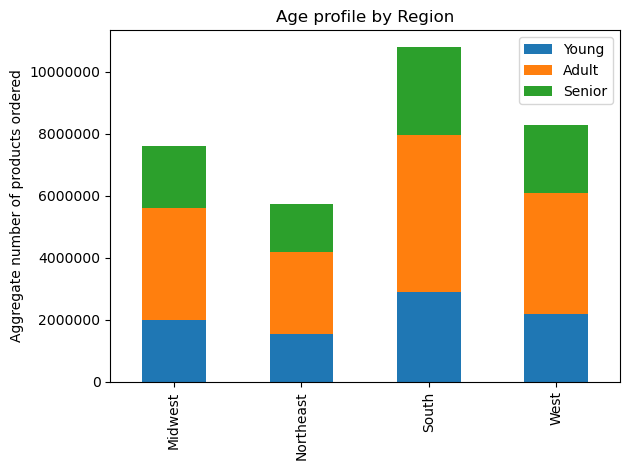

In [170]:
# Plot a stacked bar chart for the crosstab result
age_profile_by_region_chart = age_profile_by_region.plot(kind = 'bar', stacked = True)

# Add title and labels
plt.title('Age profile by Region')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')
plt.legend(title = None)

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Display the plot
plt.show()

In [171]:
age_profile_by_region_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.8 - Age profile by Region.png'))

### 12.1.2. Age profile by product category

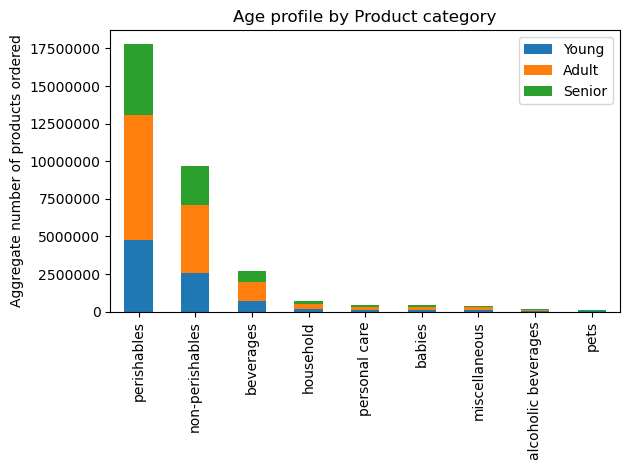

In [173]:
# Calculate the total across all ages for each product_category
total_age_by_product_category = age_profile_by_product_category.sum(axis = 1)

# Sort the crosstab by total frequency of product_category in descending order
age_profile_by_product_category_sorted = age_profile_by_product_category.loc[total_age_by_product_category.sort_values(ascending = False).index]

# Plot the sorted stacked bar chart and capture the Axes object
ax_2 = age_profile_by_product_category_sorted.plot(kind = 'bar', stacked=True)

# Set the title and labels
plt.title('Age profile by Product category')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')
plt.legend(title = None)

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

# Save the chart using the figure object from the Axes
age_profile_by_product_category_fig = ax_2.get_figure()  

# Fit the chart to the figure
plt.tight_layout()

# Show the plot
plt.show()

In [174]:
age_profile_by_product_category_fig.savefig(os.path.join(path, '04 - Analysis', 'Visualisations', '10.9 - Age profile by Product category.png'))

## 12.2. Income profile

### 12.2.1. Income profile by region

<Figure size 640x480 with 0 Axes>

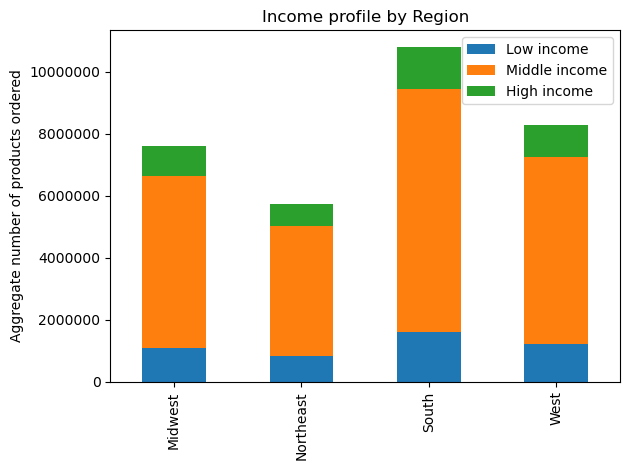

In [177]:
#Fit chart to size
plt.tight_layout()

# Plot a stacked bar chart for the crosstab result
income_profile_by_region_chart = income_profile_by_region.plot(kind = 'bar', stacked = True)

# Add title and labels
plt.title('Income profile by Region')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')
plt.legend(title = None)

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Display the plot
plt.show()

In [178]:
income_profile_by_region_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.10 - Income profile by Region.png'))

### 12.2.2. Income profile by product category

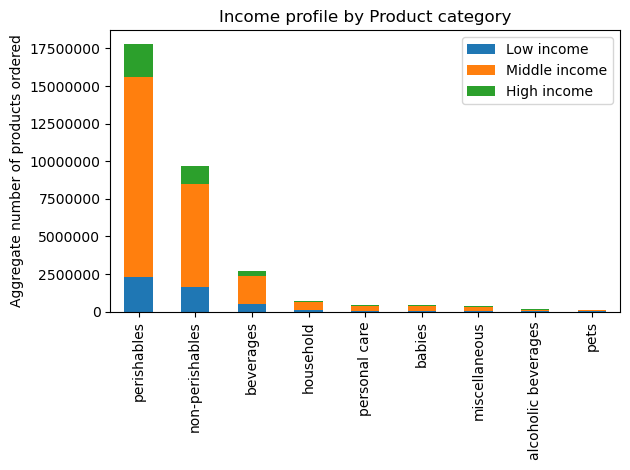

In [180]:
# Calculate the total across all ages for each product_category
total_income_by_product_category = income_profile_by_product_category.sum(axis = 1)

# Sort the crosstab by total frequency of product_category in descending order
income_profile_by_product_category_sorted = income_profile_by_product_category.loc[total_income_by_product_category.sort_values(ascending = False).index]

# Plot the sorted stacked bar chart
ax_3 = income_profile_by_product_category_sorted.plot(kind='bar', stacked = True)

# Add title and labels
plt.title('Income profile by Product category')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')
plt.legend(title = None)

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

# Save the chart using the figure object from the Axes
income_profile_by_product_category_fig = ax_3.get_figure()  

#Fit chart to size
plt.tight_layout()

# Display the plot
plt.show()

In [181]:
income_profile_by_product_category_fig.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.11 - Income profile by Product category.png'))

## 12.3. Family status

### 12.3.1. Family status by region

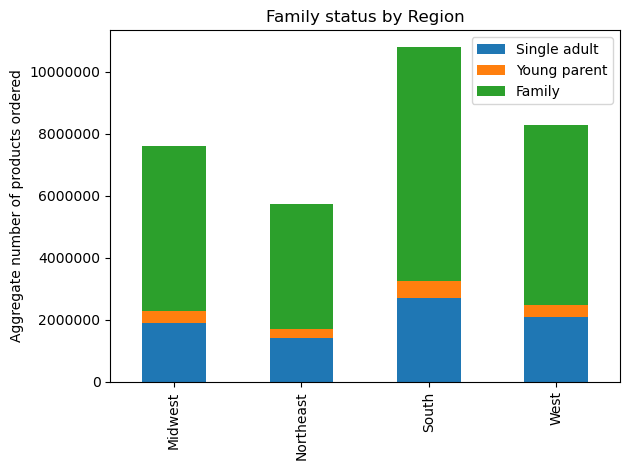

In [184]:
# Plot a stacked bar chart for the crosstab result
family_status_by_region_chart = family_status_by_region.plot(kind = 'bar', stacked = True)

# Add title and labels
plt.title('Family status by Region')
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')
plt.legend(title = None)


#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Display the plot
plt.show()

In [185]:
family_status_by_region_chart.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.12 - Family status by Region.png'))

### 12.3.2. Family status by product category

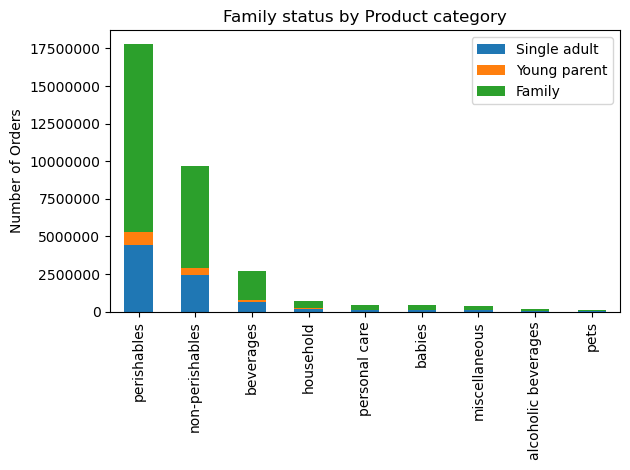

In [187]:
# Calculate the total across all ages for each product_category
total_family_by_product_category = family_status_by_product_category.sum(axis=1)

# Sort the crosstab by total frequency of product_category in descending order
family_status_by_product_category_sorted = family_status_by_product_category.loc[total_family_by_product_category.sort_values(ascending = False).index]

# Plot the sorted stacked bar chart
ax_4 = family_status_by_product_category_sorted.plot(kind = 'bar', stacked = True)

# Add title and labels
plt.title('Family status by Product category')
plt.xlabel('')
plt.ylabel('Number of Orders')
plt.legend(title = None)

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

# Save the chart using the figure object from the Axes
family_status_by_product_category_fig = ax_4.get_figure()  

#Fit chart to size
plt.tight_layout()

# Display the plot
plt.show()

In [188]:
family_status_by_product_category_fig.savefig(os.path.join(path, '04 - Analysis','Visualisations', '10.13 - Family status by Product category.png'))

# 13. Export dataframe

In [190]:
#View dimensions
df_final_merged.shape

(32404859, 38)

In [191]:
#Exporting dataset
df_final_merged.to_pickle(os.path.join(path, '02 - Data','Prepared Data', '10_final_merged.pkl'))

# Task

## 1. Import dataset
Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

##### Refer: 2. Import datasets

## 2. Personally identifiable information (PII)
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

##### Refer: 4. Personally identifiable information (PII)

## 3. Regional segmentation
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this [Wikipedia article](https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States) to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


##### Refer: 5. Regional Segmentation

## 4. Subset - Low-activity customers
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

##### Refer: 6. Low-activity customers

## 5. Customer profiling
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

##### Refer: 7. Customer profiling

## 6. Profile visualisations
Create an appropriate visualization to show the distribution of profiles.

##### Refer: 9. Profile visualisations

## 7. Profile aggregations
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

##### Refer: 10. Profile aggregations

## 8. Profiles by region and departments
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

##### Refer: 11. Profiles by region and department

## 9. Plot profile charts
Produce suitable charts to illustrate your results and export them in your project folder.

##### Refer: 12. Plot profile charts

## 10. Check notebook and save
Tidy up your script, export your final data set, and save your notebook.

##### Checked notebook, included section headings and code comments
##### Refer: 13. Export dataframe